In [1]:
import torch
from model import AlexNet
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create model
model = AlexNet(num_classes=5)
# model = resnet34(num_classes=5)
# load model weights
model_weight_path = "./AlexNet.pth"  # "resNet34.pth"
model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

In [3]:
weights_keys = model.state_dict().keys()

In [4]:
weights_keys

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])

mean is 0.00012684061948675662, std is 0.01988442800939083, min is 0.08067113161087036, max is -0.07899781316518784


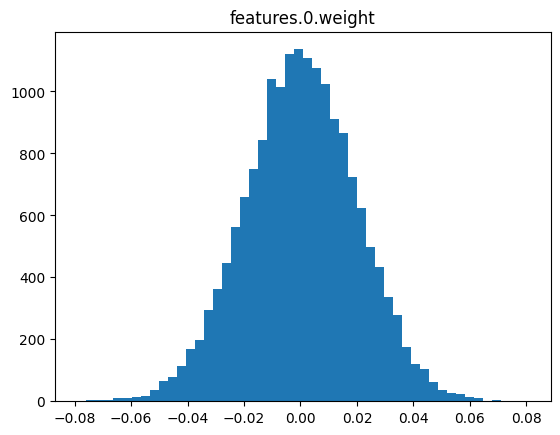

mean is -0.0023522600531578064, std is 0.02637951262295246, min is 0.11263393610715866, max is -0.13026145100593567


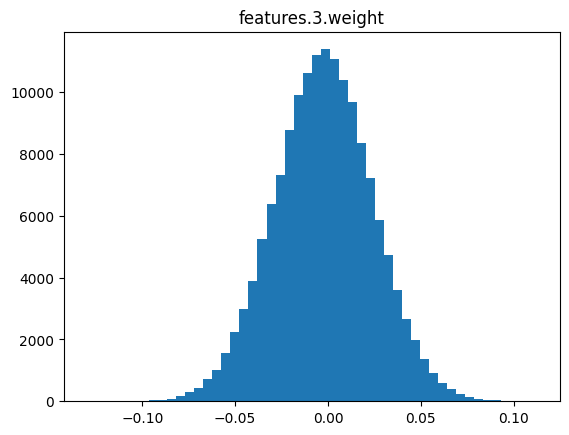

mean is -0.0026423796080052853, std is 0.035418469458818436, min is 0.15388433635234833, max is -0.16310982406139374


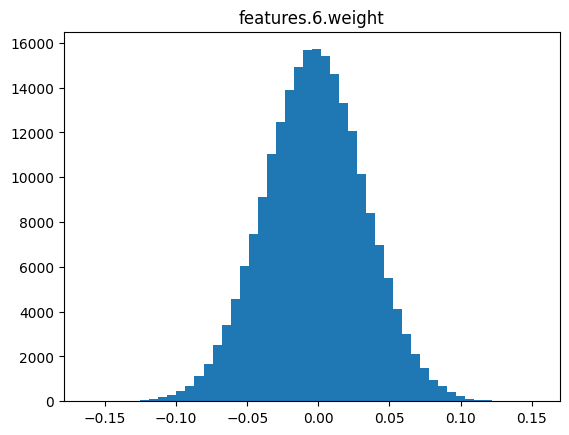

mean is -0.0015129861421883106, std is 0.03536006808280945, min is 0.154008686542511, max is -0.152112677693367


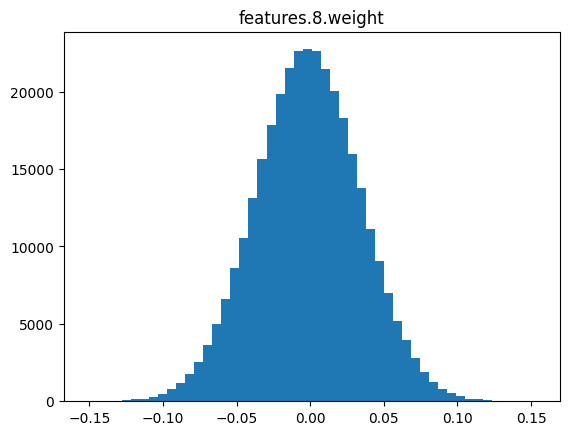

mean is -0.003044846700504422, std is 0.04277605935931206, min is 0.18090306222438812, max is -0.19116328656673431


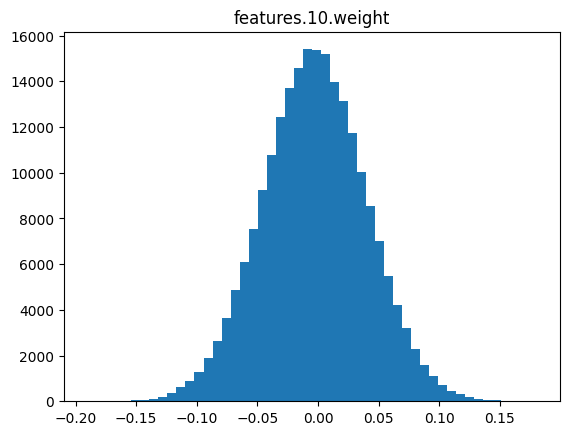

In [10]:
for key in weights_keys:
    # remove num_batches_tracked para(in bn)
    if "num_batches_tracked" in key:
        continue
    # weight_t = [kernel_number, kernel_channel, kernel_height, kernel_width] -> 第一个参数对应输出通道的大小，第二个参数对应输入的通道
    if "bias" in key or "classifier" in key:
        continue
    else:
        weight_t = model.state_dict()[key].numpy()

    # read a kernel information
    # k = weight_t[0, :, :, :]

    # calculate mean, std, min, max
    weight_mean = weight_t.mean()
    weight_std = weight_t.std(ddof=1)
    weight_min = weight_t.min()
    weight_max = weight_t.max()
    print("mean is {}, std is {}, min is {}, max is {}".format(weight_mean,
                                                               weight_std,
                                                               weight_max,
                                                               weight_min))

    # plot hist image
    plt.close()
    weight_vec = np.reshape(weight_t, [-1])  # 展平成一维
    plt.hist(weight_vec, bins=50)
    plt.title(key)
    plt.show()